In [1]:
#import the dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# File to Load (Remember to change these)
original_train_data = "/Users/fernandawolburg/Downloads/original_data_train.csv"

# Read the data
train_nba = pd.read_csv(original_train_data)
train_nba.head()

,TEAM,SEASON,GP,W,L,WIN%,MIN,POSS,OPP POSS,PACE,...,OPP AST/TO,OPP STL Total,OPP STL Per 100 Poss,OPP BLK Total,OPP BLK Per 100 Poss,OPP BLKA Total,OPP BLKA Per 100 Poss,OPP PF Total,OPP PF Per 100 Poss,PLAYOFF RESULT
0,Atlanta Hawks,2009-10,82,53,29,0.646,3971,7512,7506,90.77,...,1.51,506,6.741274,359,4.782840,413,5.502265,1582,21.076472,CSF
1,Atlanta Hawks,2010-11,82,44,38,0.537,3946,7412,7426,90.22,...,1.71,548,7.379478,348,4.686238,341,4.591974,1517,20.428225,CSF
2,Atlanta Hawks,2011-12,66,40,26,0.606,3233,6118,6124,90.88,...,1.36,494,8.066623,313,5.111039,303,4.947747,1263,20.623775,R1
3,Atlanta Hawks,2012-13,82,44,38,0.537,3971,7745,7736,93.56,...,1.46,689,8.906412,350,4.524302,369,4.769907,1543,19.945708,R1
4,Atlanta Hawks,2013-14,82,38,44,0.463,3966,7895,7872,95.41,...,1.52,672,8.536585,354,4.496951,326,4.141260,1643,20.871443,R1


In [8]:
train_nba.shape

(300, 98)

In [10]:
train_nba.mean()

GP                         80.393333
W                          40.196667
L                          40.196667
WIN%                        0.499993
MIN                      3887.346667
POSS                     7726.010000
OPP POSS                 7726.183333
PACE                       95.339733
PIE                        49.993333
+/- Total                   0.000000
+/- Per 100 Poss            0.008065
PTS Total                8219.353333
PTS Per 100 Poss          106.285696
FGM Total                3071.810000
FGM Per 100 Poss           39.742470
FGA Total                6742.276667
FGA Per 100 Poss           87.277029
FG%                        45.549333
3PM Total                 662.736667
3PM Per 100 Poss            8.501982
3PA Total                1860.836667
3PA Per 100 Poss           23.882049
3P%                        35.488667
EFG%                       50.424000
FTM Total                1412.996667
FTM Per 100 Poss           18.298773
FTA Total                1859.843333
F

In [11]:
train_nba.loc[:,"FGM Per 100 Poss"].mean()

39.74247022535528

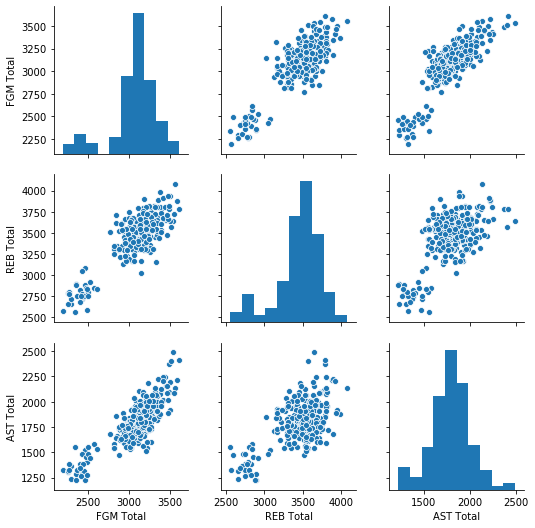

In [17]:
sns.pairplot(train_nba[["FGM Total", "REB Total", "AST Total"]])
plt.show()

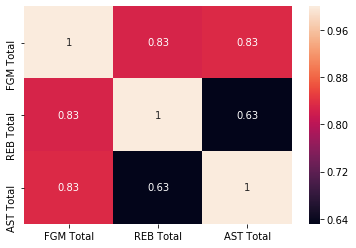

In [18]:
correlation = train_nba[["FGM Total", "REB Total", "AST Total"]].corr()
sns.heatmap(correlation, annot=True)

In [19]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1)
good_columns = train_nba._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_
labels

array([4, 4, 2, 4, 1, 1, 1, 1, 3, 3, 4, 4, 2, 4, 0, 1, 1, 1, 1, 3, 4, 4,
       0, 0, 3, 3, 3, 4, 4, 2, 0, 4, 0, 1, 1, 3, 3, 0, 4, 2, 4, 4, 4, 1,
       1, 3, 3, 4, 0, 2, 0, 0, 1, 1, 3, 3, 3, 4, 4, 2, 0, 1, 1, 1, 1, 1,
       3, 4, 1, 2, 1, 1, 1, 1, 3, 3, 3, 0, 0, 2, 0, 0, 1, 1, 1, 1, 3, 1,
       0, 2, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 1, 1, 1, 3, 3, 3, 0, 0, 2,
       4, 4, 4, 1, 1, 1, 1, 1, 1, 3, 3, 0, 0, 2, 4, 1, 1, 4, 4, 2, 1, 1,
       0, 0, 1, 3, 3, 0, 4, 2, 4, 4, 4, 0, 1, 1, 1, 4, 4, 2, 4, 4, 4, 4,
       1, 1, 3, 4, 4, 2, 0, 0, 4, 0, 1, 1, 3, 0, 0, 2, 0, 1, 0, 0, 1, 1,
       3, 0, 0, 2, 0, 4, 2, 4, 0, 4, 1, 3, 3, 3, 1, 1, 2, 4, 4, 0, 0, 1,
       1, 3, 4, 4, 2, 4, 1, 1, 1, 1, 1, 3, 4, 4, 2, 0, 0, 0, 1, 1, 1, 3,
       0, 4, 2, 0, 0, 0, 0, 1, 3, 3, 1, 1, 2, 0, 1, 1, 1, 3, 3, 3, 4, 4,
       2, 0, 1, 1, 1, 1, 1, 3, 0, 0, 2, 0, 0, 0, 1, 1, 1, 3, 4, 4, 2, 4,
       4, 4, 4, 1, 1, 3, 0, 0, 2, 4, 4, 1, 4, 1, 3, 3, 4, 0, 2, 4, 0, 4,
       4, 4, 1, 3, 0, 0, 2, 0, 4, 4, 1, 1, 1, 3], d

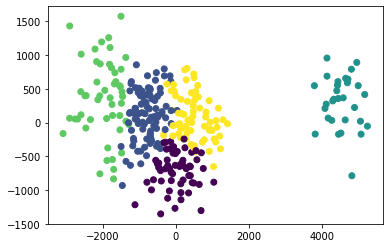

In [20]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [21]:
plot_columns

array([[ 4.63935643e+02,  8.99895125e+01],
       [ 1.04609111e+03, -2.43861103e+02],
       [ 4.63714073e+03,  6.56655474e+02],
       [ 2.16090952e+02,  1.20927348e+02],
       [-2.78240995e+02,  7.01200446e+01],
       [-1.58831178e+02,  6.92399550e+02],
       [-6.97965099e+02,  4.90284216e+02],
       [-1.00964414e+03,  1.33967598e+02],
       [-1.28611436e+03, -2.79437802e+01],
       [-3.08103294e+03, -1.63232022e+02],
       [ 7.82225684e+02, -5.45986180e+01],
       [ 1.29014273e+03,  4.14923953e+01],
       [ 5.15759968e+03,  4.16091928e+02],
       [ 7.24362372e+02, -2.89442788e+02],
       [ 1.92683423e+02, -5.59646646e+02],
       [-6.01843667e+02, -4.31223635e+01],
       [-1.11119227e+03,  1.24927517e+02],
       [-1.22530903e+03,  5.78850697e+02],
       [-7.74810054e+02,  6.93904161e+02],
       [-2.06559575e+03,  8.69078547e+02],
       [ 8.23634728e+02,  1.56085514e+02],
       [ 3.41418713e+02, -1.16777671e+02],
       [-6.18534654e+01, -3.57035171e+02],
       [-4.

In [27]:
# Find player LeBron
Warriors = good_columns.loc[ train_nba['TEAM'] == 'Memphis Grizzlies',: ]

#Find player Durant
Spurs = good_columns.loc[ train_nba['TEAM'] == 'Toronto Raptors',: ]

#print the players
#print(Warriors)
#print(Spurs)

In [28]:
#Change the dataframes to a list 
warrios_list = Warriors.values.tolist()
spurs_list = Spurs.values.tolist()

#Predict which group LeBron James and Kevin Durant belongs
warriors_Cluster_Label = kmeans_model.predict(warrios_list)
spurs_Cluster_Label = kmeans_model.predict(spurs_list)

print(warriors_Cluster_Label)
print(spurs_Cluster_Label)

[0 4 2 4 4 4 0 1 1 1]
[0 0 2 4 4 1 4 1 3 3]


In [25]:
train_nba.corr()
# HIGHLY CORRELATED TO W: +/- Per 100 Poss, PIE, FGM Per 100 Poss
# HIGHLY CORRELATED TO POSS

,GP,W,L,WIN%,MIN,POSS,OPP POSS,PACE,PIE,+/- Total,...,OPP TOV Per 100 Poss,OPP AST/TO,OPP STL Total,OPP STL Per 100 Poss,OPP BLK Total,OPP BLK Per 100 Poss,OPP BLKA Total,OPP BLKA Per 100 Poss,OPP PF Total,OPP PF Per 100 Poss
GP,1.000000,0.190116,0.191073,-0.000300,0.998079,0.901039,0.899570,0.311997,-0.000938,-0.000572,...,-0.197810,0.209625,0.541143,-0.158962,0.305635,-0.164076,0.300037,-0.158900,0.732684,0.020609
W,0.190116,1.000000,-0.927347,0.979952,0.191873,0.151280,0.142450,0.003117,0.926648,0.952774,...,0.054251,-0.323693,-0.085022,-0.248495,-0.355936,-0.440577,0.345796,0.274153,0.249311,0.189350
L,0.191073,-0.927347,1.000000,-0.979881,0.188584,0.192183,0.200451,0.115802,-0.926830,-0.952812,...,-0.129637,0.403531,0.291265,0.187859,0.472362,0.377955,-0.231371,-0.334666,0.030001,-0.181459
WIN%,-0.000300,0.979952,-0.979881,1.000000,0.002351,-0.020066,-0.028766,-0.056926,0.947567,0.969034,...,0.094566,-0.372949,-0.189678,-0.221071,-0.418276,-0.414780,0.293060,0.309981,0.110464,0.186405
MIN,0.998079,0.191873,0.188584,0.002351,1.000000,0.898088,0.896589,0.302187,0.001293,-0.000006,...,-0.193090,0.201271,0.536062,-0.162598,0.306201,-0.161948,0.299748,-0.157742,0.732576,0.023923
POSS,0.901039,0.151280,0.192183,-0.020066,0.898088,1.000000,0.999789,0.690278,-0.019415,-0.014772,...,-0.295384,0.326420,0.651199,-0.103552,0.318369,-0.196271,0.294548,-0.208844,0.701909,-0.132108
OPP POSS,0.899570,0.142450,0.200451,-0.028766,0.896589,0.999789,1.000000,0.692786,-0.028014,-0.023564,...,-0.294517,0.328253,0.654441,-0.099425,0.323996,-0.190527,0.292417,-0.211130,0.700687,-0.134065
PACE,0.311997,0.003117,0.115802,-0.056926,0.302187,0.690278,0.692786,1.000000,-0.053621,-0.041420,...,-0.319161,0.376205,0.533237,0.047304,0.193539,-0.151890,0.145034,-0.193760,0.317209,-0.325151
PIE,-0.000938,0.926648,-0.926830,0.947567,0.001293,-0.019415,-0.028014,-0.053621,1.000000,0.963757,...,0.100029,-0.410618,-0.166487,-0.192792,-0.434318,-0.432316,0.362423,0.382091,0.119144,0.195318
+/- Total,-0.000572,0.952774,-0.952812,0.969034,-0.000006,-0.014772,-0.023564,-0.041420,0.963757,1.000000,...,0.097201,-0.387818,-0.194533,-0.232099,-0.435851,-0.434288,0.308090,0.321209,0.118441,0.189038
